In [11]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [12]:
import pandas as pd
df=pd.read_csv(r'insurance.csv')

In [13]:
df["sex"]=df["sex"].map({"male":1,"female":0})
df["smoker"]=df["smoker"].map({"yes":1,"no":0})
df = pd.get_dummies(df,columns=["region"], drop_first=True)

print(df.head)

<bound method NDFrame.head of       age  sex   bmi  children  smoker  expenses  region_northwest  \
0      19    0  27.9         0       1  16884.92             False   
1      18    1  33.8         1       0   1725.55             False   
2      28    1  33.0         3       0   4449.46             False   
3      33    1  22.7         0       0  21984.47              True   
4      32    1  28.9         0       0   3866.86              True   
...   ...  ...   ...       ...     ...       ...               ...   
1333   50    1  31.0         3       0  10600.55              True   
1334   18    0  31.9         0       0   2205.98             False   
1335   18    0  36.9         0       0   1629.83             False   
1336   21    0  25.8         0       0   2007.95             False   
1337   61    0  29.1         0       1  29141.36              True   

      region_southeast  region_southwest  
0                False              True  
1                 True             False  


In [14]:
df.head

<bound method NDFrame.head of       age  sex   bmi  children  smoker  expenses  region_northwest  \
0      19    0  27.9         0       1  16884.92             False   
1      18    1  33.8         1       0   1725.55             False   
2      28    1  33.0         3       0   4449.46             False   
3      33    1  22.7         0       0  21984.47              True   
4      32    1  28.9         0       0   3866.86              True   
...   ...  ...   ...       ...     ...       ...               ...   
1333   50    1  31.0         3       0  10600.55              True   
1334   18    0  31.9         0       0   2205.98             False   
1335   18    0  36.9         0       0   1629.83             False   
1336   21    0  25.8         0       0   2007.95             False   
1337   61    0  29.1         0       1  29141.36              True   

      region_southeast  region_southwest  
0                False              True  
1                 True             False  


In [15]:
x_train=df[["age","sex","bmi","children","smoker","region_northwest", "region_southeast", "region_southwest"]].to_numpy()
y_train=df["expenses"].to_numpy()

In [16]:
n=x_train.shape[1]
w_init=np.zeros(n)
b_init=0.0
print(w_init)
print(b_init)

[0. 0. 0. 0. 0. 0. 0. 0.]
0.0


In [17]:
m = x_train.shape[0]
split = int(0.8 * m)

x_train = x_train[:split]
x_test  = x_train[split:]

y_train = y_train[:split]
y_test  = y_train[split:]

In [18]:
#standardizing the data

x_train = np.array(x_train, dtype=float)
x_test = np.array(x_test, dtype=float)  

# Calculate mean and standard deviation
mu = x_train.mean(axis=0)
sigma = x_train.std(axis=0)

# Add small epsilon to avoid division by zero
epsilon = 1e-8
sigma = np.where(sigma < epsilon, epsilon, sigma) 

x_train = (x_train - mu) / sigma
x_test = (x_test - mu) / sigma

y_train = y_train.astype(float) / 1000
y_test  = y_test.astype(float) / 1000


In [19]:
def predict(x,w,b):
    #x is an array, w is an aray of weights and b is the scalar
    n=x_train.shape[1]
    p=0
    for i in range(n):
        p=p+x[i]*w[i]
    p=p+b
    return p

In [20]:
x_vec=x_train[0, :]
print(x_vec.shape)
print(x_vec)

f_wb=predict(x_vec,w_init,b_init)
print("prediction:",f_wb)

(8,)
[-1.45390122 -1.02077653 -0.47432708 -0.90286618  1.99417757 -0.55791981
 -0.6155209   1.76504522]
prediction: 0.0


In [21]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)                         
    return cost

In [22]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 159.64516338170415


In [23]:
def compute_gradient(x, y, w, b):
    """
     Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
     """
    m,n=x.shape
    dj_dw=np.zeros(n)
    dj_db=0

    for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]   
        for j in range(n):                           
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err   
        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [24]:
temp_dw, temp_db=compute_gradient(x_train, y_train, w_init, b_init)
print(temp_dw)
print(temp_db)

-13.214126046728953
[-3.81919197 -0.55741002 -2.34072044 -0.71717872 -9.40749433  0.44834571
 -0.87578305  0.654549  ]


In [25]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b) 

        w = w - alpha * dj_dw
        b = b - alpha * dj_db 
      
        if i<100000:   
            J_history.append( cost_function(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history

In [26]:
initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 1000
alpha = 0.01

w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m = x_train.shape[0]
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost   156.81   
Iteration  100: Cost    36.77   
Iteration  200: Cost    20.76   
Iteration  300: Cost    18.56   
Iteration  400: Cost    18.25   
Iteration  500: Cost    18.20   
Iteration  600: Cost    18.19   
Iteration  700: Cost    18.19   
Iteration  800: Cost    18.19   
Iteration  900: Cost    18.19   
b,w found by gradient descent: 13.21,[ 3.66893789 -0.12576384  2.05812448  0.52405642  9.47685727 -0.18052083
 -0.47645222 -0.51304678] 
prediction: 24.95, target value: 16.884919999999997
prediction: 3.35, target value: 1.72555
prediction: 6.55, target value: 4.44946
prediction: 3.69, target value: 21.98447
prediction: 5.53, target value: 3.86686
prediction: 3.79, target value: 3.75662
prediction: 10.73, target value: 8.240590000000001
prediction: 7.99, target value: 7.28151
prediction: 8.43, target value: 6.40641
prediction: 12.00, target value: 28.92314
prediction: 3.22, target value: 2.72132
prediction: 35.69, target value: 27.80873
prediction: 4.28, target 

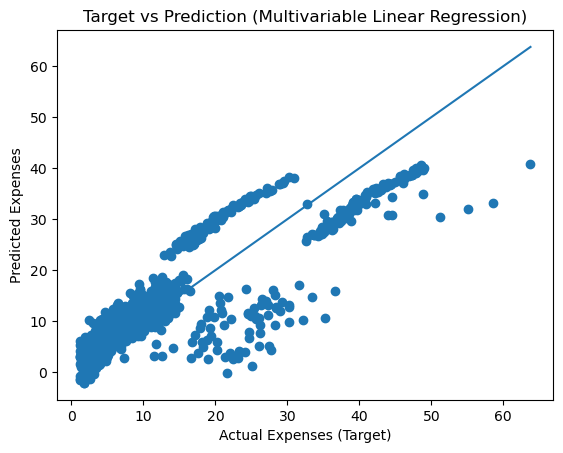

In [27]:
y_pred = np.dot(x_train, w_final) + b_final

plt.scatter(y_train, y_pred)
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()])

plt.xlabel("Actual Expenses (Target)")
plt.ylabel("Predicted Expenses")
plt.title("Target vs Prediction (Multivariable Linear Regression)")
plt.show()
